# Dataset and Preprocessing
--------------------------------------------------------------------------

### Import Statements
-------------

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.manifold import TSNE
%pylab inline
from IPython.display import Markdown, display
#For displaying titles
def printmrdwn(string):
    display(Markdown(string))
#To disable scroll bar    
# %%javascript
# IPython.OutputArea.prototype._should_scroll = function(lines) {
#     return false;
# }
# %load_ext disable_autoscroll


Populating the interactive namespace from numpy and matplotlib


### Function to plot the dataset (t-SNE)
--------------------------------------------------------

In [3]:
def plot_data(Dataset_name,X_data,y_target):
    model =TSNE(n_components=2,random_state=0,perplexity=30,n_iter=1000)
    tsne_data=model.fit_transform(X_data)
    tsne_datastack=np.vstack((tsne_data.T,y_target)).T
    tsne_df=pd.DataFrame(data=tsne_datastack,columns=("Dim_1","Dim_2","class"))
    sn=sns.FacetGrid(tsne_df,hue="class",size=4)
    sn.map(plt.scatter,'Dim_1','Dim_2',alpha=1, 
          edgecolor='white', linewidth=0.25, s=100).add_legend(title="class")
    plt.axis('off')
    plt.title(Dataset_name)
    plt.show()

### Dataset 1-  **Titanic DataSet**
***********************************************
**Preprocessing method**

In [4]:
#Titanic Dataset
#https://www.kaggle.com/c/titanic/data
def get_titanic_data():
    df_titanic=pd.read_csv('titanic.csv',)
    #Remove unnecessary columns (body= Body Indentification number, Name= Name)
    df_titanic.drop(['name','body'],1,inplace=True)
    #Fill all the na  
    df_titanic.cabin.fillna('unknown',inplace=True)
    df_titanic.age.fillna(df_titanic['age'].mean(),inplace=True)
    df_titanic.fillna(0,inplace=True)
    #Covert nonnumeric value into numeric
    df_titanic['sex'] = LabelEncoder().fit_transform(df_titanic['sex'])
    df_titanic['cabin'] = LabelEncoder().fit_transform(df_titanic['cabin'].astype(str))
    df_titanic['embarked'] = LabelEncoder().fit_transform(df_titanic['embarked'].astype(str))
    df_titanic['home.dest'] = LabelEncoder().fit_transform(df_titanic['home.dest'].astype(str))
    df_titanic['ticket'] = LabelEncoder().fit_transform(df_titanic['ticket'])
    df_titanic['boat'] = LabelEncoder().fit_transform(df_titanic['boat'].astype(str))
    # df_titanic.head()
    # df_titanic.dtypes
    # print(df_titanic.isnull().sum())
    X = df_titanic.drop("pclass", axis = 1)
    y = df_titanic['pclass']
    print("\n** Titanic Dataset **\n\n",X.head())
    print("\n** Class Column **\n",y.head())    
    return X,y

**Visualizing the dataset using t-SNE**


** Titanic Dataset **

    survived  sex      age  sibsp  parch  ticket      fare  cabin  embarked  \
0         1    0  29.0000      0      0     187  211.3375     43         3   
1         1    1   0.9167      1      2      49  151.5500     79         3   
2         0    0   2.0000      1      2      49  151.5500     79         3   
3         0    1  30.0000      1      2      49  151.5500     79         3   
4         0    0  25.0000      1      2      49  151.5500     79         3   

   boat  home.dest  
0    12        309  
1     3        231  
2     0        231  
3     0        231  
4     0        231  

** Class Column **
 0    1
1    1
2    1
3    1
4    1
Name: pclass, dtype: int64


C:\Users\Petrofac\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


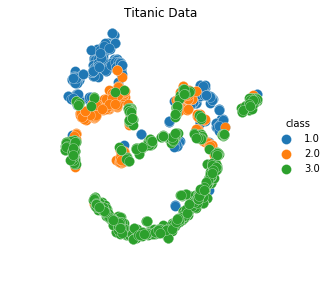

In [5]:
X_titanic,y_titanic=get_titanic_data()
plot_data("Titanic Data",X_titanic,y_titanic)

### Dataset 2- Breast Cancer Dataset
***********************************************
**Preprocessing method**

In [6]:
#Breast Cancer Dataset
#http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/
def get_breastCancer_dataset():

    df_cancer=pd.read_csv('breast-cancer-wisconsin.csv')
    printmrdwn("Data Description")
    print(df_cancer.describe())
    df_cancer['Bare_Nuclei'] = LabelEncoder().fit_transform(df_cancer['Bare_Nuclei'])
    df_cancer= df_cancer.drop("ID_Number", axis = 1)
    printmrdwn("Data Distribution")
    df_cancer['Class'].value_counts().sort_index().plot.bar()
    plt.show()
    printmrdwn("Data Types")
    print(df_cancer.dtypes)
    y = df_cancer['Class']
    X = df_cancer.drop("Class", axis = 1)
    printmrdwn("Breast Cancer Dataset")
    print(X.head())
    printmrdwn("Class Column")
    print(y.head()) 
    return X, y

Data Description

          ID_Number  ClumpThickness  Uniformity_Cell_Size  \
count  6.990000e+02      699.000000            699.000000   
mean   1.071704e+06        4.417740              3.134478   
std    6.170957e+05        2.815741              3.051459   
min    6.163400e+04        1.000000              1.000000   
25%    8.706885e+05        2.000000              1.000000   
50%    1.171710e+06        4.000000              1.000000   
75%    1.238298e+06        6.000000              5.000000   
max    1.345435e+07       10.000000             10.000000   

       Uniformity_Cell_Shape  Marginal_Adhesion  Single_Epithelial_cell_Size  \
count             699.000000         699.000000                   699.000000   
mean                3.207439           2.806867                     3.216023   
std                 2.971913           2.855379                     2.214300   
min                 1.000000           1.000000                     1.000000   
25%                 1.000000           1.000000   

Data Distribution

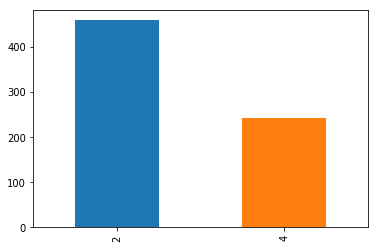

Data Types

ClumpThickness                 int64
Uniformity_Cell_Size           int64
Uniformity_Cell_Shape          int64
Marginal_Adhesion              int64
Single_Epithelial_cell_Size    int64
Bare_Nuclei                    int32
Bland_Chromatin                int64
Normal_Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object


Breast Cancer Dataset

   ClumpThickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
0               5                     1                      1   
1               5                     4                      4   
2               3                     1                      1   
3               6                     8                      8   
4               4                     1                      1   

   Marginal_Adhesion  Single_Epithelial_cell_Size  Bare_Nuclei  \
0                  1                            2            0   
1                  5                            7            1   
2                  1                            2            2   
3                  1                            3            4   
4                  3                            2            0   

   Bland_Chromatin  Normal_Nucleoli  Mitoses  
0                3                1        1  
1                3                2        1  
2                3                1        1  
3                3

Class Column

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64


C:\Users\Petrofac\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


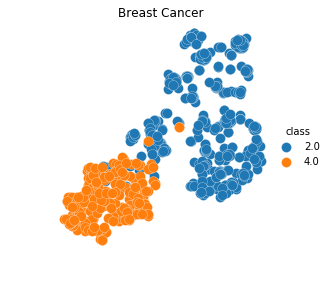

In [7]:
X_breastCancer,y_breastCancer=get_breastCancer_dataset()
plot_data("Breast Cancer",X_breastCancer,y_breastCancer)

### Dataset 3- Glass Dataset
***********************************************
**Preprocessing method**

In [8]:
def get_glass():
    #Reading dataset from the csv file
    df_glass=pd.read_csv('glass.csv')
    printmrdwn("Data Description")
    print(df_glass.describe())
    #Randomozing the dataset rows
    np.random.seed(1)
    shuffled_index=np.random.permutation(df_glass.index)
    df_glass=df_glass.loc[shuffled_index]
    #NonUniform distribution of data
    printmrdwn("Data Distribution")
    df_glass['Type'].value_counts().sort_index().plot.bar()
    plt.show()
    printmrdwn("Data Types")
    print(df_glass.dtypes)
    #Convert dataset into taarget and attribute set
    # axis 1 refers to the columns
    X= df_glass.drop('Type', axis = 1)
    y=df_glass['Type']
    printmrdwn("Glass Dataset",)
    print(X.head())
    printmrdwn("Class Column")
    print(y.head()) 
    #feature_list=dataset_data.columns
    return X, y

Data Description

               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516523   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1

Data Distribution

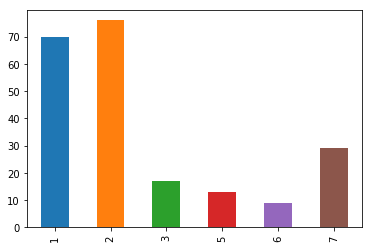

Data Types

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object


Glass Dataset

          RI     Na    Mg    Al     Si     K     Ca    Ba    Fe
108  1.52222  14.43  0.00  1.00  72.67  0.10  11.52  0.00  0.08
206  1.51645  14.94  0.00  1.87  73.11  0.00   8.67  1.38  0.00
106  1.53125  10.73  0.00  2.10  69.81  0.58  13.30  3.15  0.28
107  1.53393  12.30  0.00  1.00  70.16  0.12  16.19  0.00  0.24
51   1.51926  13.20  3.33  1.28  72.36  0.60   9.14  0.00  0.11


Class Column

108    2
206    7
106    2
107    2
51     1
Name: Type, dtype: int64


C:\Users\Petrofac\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


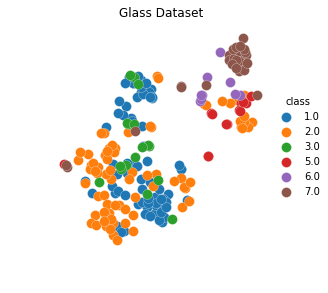

In [9]:
X_glass,y_glass=get_glass()
plot_data("Glass Dataset",X_glass,y_glass)

### Dataset 4- Audit Dataset
***********************************************
**Preprocessing method**

In [12]:
#https://archive.ics.uci.edu/ml/machine-learning-databases/00475/
#Audit Dataset
def get_auditData():
    #Reading dataset from the csv file
    df_auditrisk=pd.read_csv('audit_risk.csv')
    printmrdwn("Data Description")
    print(df_auditrisk.describe())
    #Randomozing the dataset rows
    np.random.seed(1)
    shuffled_index=np.random.permutation(df_auditrisk.index)
    df_auditrisk=df_auditrisk.loc[shuffled_index]
    #NonUniform distribution of data
    printmrdwn("Data Distribution")
    df_auditrisk['Risk'].value_counts().sort_index().plot.bar()
    # print(df_auditrisk.isna().sum())
    df_auditrisk.Money_Value.fillna(0,inplace=True)
    plt.show()    
    df_auditrisk['LOCATION_ID'] = LabelEncoder().fit_transform(df_auditrisk['LOCATION_ID'])
    printmrdwn("Data Types")
    print(df_auditrisk.dtypes)
    #Convert dataset into taarget and attribute set
    # axis 1 refers to the columns
    X= df_auditrisk.drop('Risk', axis = 1)
    y=df_auditrisk['Risk']
    printmrdwn("Audit Dataset")
    print(X.head())
    printmrdwn("Risk Column")
    print(y.head()) 
    return(X,y)

Data Description

       Sector_score      PARA_A     Score_A      Risk_A       PARA_B  \
count    776.000000  776.000000  776.000000  776.000000   776.000000   
mean      20.184536    2.450194    0.351289    1.351029    10.799988   
std       24.319017    5.678870    0.174055    3.440447    50.083624   
min        1.850000    0.000000    0.200000    0.000000     0.000000   
25%        2.370000    0.210000    0.200000    0.042000     0.000000   
50%        3.890000    0.875000    0.200000    0.175000     0.405000   
75%       55.570000    2.480000    0.600000    1.488000     4.160000   
max       59.850000   85.000000    0.600000   51.000000  1264.630000   

          Score_B      Risk_B        TOTAL     numbers   Score_B.1  \
count  776.000000  776.000000   776.000000  776.000000  776.000000   
mean     0.313144    6.334008    13.218481    5.067655    0.223711   
std      0.169804   30.072845    51.312829    0.264449    0.080352   
min      0.200000    0.000000     0.000000    5.000000    0.200000   
2

Data Distribution

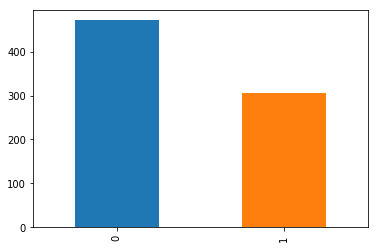

Data Types

Sector_score      float64
LOCATION_ID         int32
PARA_A            float64
Score_A           float64
Risk_A            float64
PARA_B            float64
Score_B           float64
Risk_B            float64
TOTAL             float64
numbers           float64
Score_B.1         float64
Risk_C            float64
Money_Value       float64
Score_MV          float64
Risk_D            float64
District_Loss       int64
PROB              float64
RiSk_E            float64
History             int64
Prob              float64
Risk_F            float64
Score             float64
Inherent_Risk     float64
CONTROL_RISK      float64
Detection_Risk    float64
Audit_Risk        float64
Risk                int64
dtype: object


Audit Dataset

     Sector_score  LOCATION_ID  PARA_A  Score_A  Risk_A  PARA_B  Score_B  \
374          1.99           17    0.60      0.2   0.120    0.00      0.2   
491          2.34           37    0.00      0.2   0.000    0.00      0.2   
678         55.57           41    0.00      0.2   0.000    0.00      0.2   
719         55.57           18    0.00      0.2   0.000    0.00      0.2   
412          1.85            9   19.21      0.6  11.526    2.47      0.6   

     Risk_B  TOTAL  numbers     ...      PROB  RiSk_E  History  Prob  Risk_F  \
374   0.000   0.60      5.0     ...       0.2     0.4        0   0.2     0.0   
491   0.000   0.00      5.0     ...       0.2     0.4        0   0.2     0.0   
678   0.000   0.00      5.0     ...       0.2     0.4        0   0.2     0.0   
719   0.000   0.00      5.0     ...       0.2     0.4        0   0.2     0.0   
412   1.482  21.68      5.0     ...       0.2     1.2        0   0.2     0.0   

     Score  Inherent_Risk  CONTROL_RISK  Detection_Risk  Audit

Risk Column

374    0
491    0
678    0
719    0
412    1
Name: Risk, dtype: int64


C:\Users\Petrofac\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


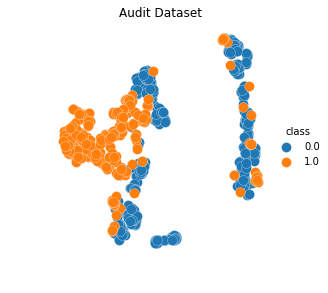

In [13]:
X_audit,y_audit=get_auditData()
plot_data("Audit Dataset",X_audit,y_audit)

### Dataset 5- Car Dataset
***********************************************
**Preprocessing method**

In [14]:
#Car Dataset
#https://archive.ics.uci.edu/ml/datasets/car+evaluation
def get_car():
    #Reading dataset from the csv file
    df_car=pd.read_csv('car.csv')
    printmrdwn("Data Description")
    print(df_car.describe())
    #Randomozing the dataset rows
    np.random.seed(1)
    shuffled_index=np.random.permutation(df_car.index)
    df_car=df_car.loc[shuffled_index]
    #NonUniform distribution of data
    printmrdwn("Data Distribution")
    df_car['Class'].value_counts().sort_index().plot.bar()
    plt.show() 
    printmrdwn("Nan Values if any")
    print(df_car.isna().sum())
    printmrdwn("Data Types")
    print(df_car.dtypes)
    printmrdwn("Data Set")
    print(df_car.head(5))
    #Encoding for ordinal value
    printmrdwn("After Ordinal Encoding")
    df_car['Buying'] = ce.OrdinalEncoder().fit_transform(df_car['Buying'])
    df_car['Buying'] = ce.OrdinalEncoder().fit_transform(df_car['Buying'])
    df_car['Maintance'] = ce.OrdinalEncoder().fit_transform(df_car['Maintance'])
    df_car['Doors'] = ce.OrdinalEncoder().fit_transform(df_car['Doors'])
    df_car['Persons'] = ce.OrdinalEncoder().fit_transform(df_car['Persons'])
    df_car['Lug_boot'] = ce.OrdinalEncoder().fit_transform(df_car['Lug_boot'])
    df_car['Sfety'] = ce.OrdinalEncoder().fit_transform(df_car['Sfety'])
    printmrdwn("Modified Data Types")
    print(df_car.dtypes)
    printmrdwn("Modified Data")
    print(df_car.head(5))
    #Convert dataset into taarget and attribute set
    # axis 1 refers to the columns
    X= df_car.drop('Class', axis = 1)
    y=df_car['Class']
    printmrdwn("Car Dataset")
    print(X.head(5))
    printmrdwn("Class Column")
    print(y.head(5))    
    return X, y

Data Description

       Buying Maintance Doors Persons Lug_boot Sfety  Class
count    1728      1728  1728    1728     1728  1728   1728
unique      4         4     4       3        3     3      4
top     vhigh     vhigh     3       2    small   med  unacc
freq      432       432   432     576      576   576   1210


Data Distribution

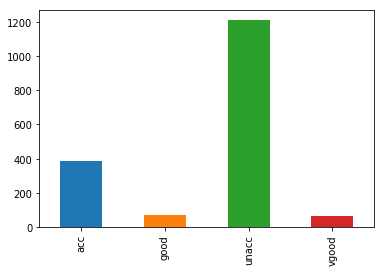

Nan Values if any

Buying       0
Maintance    0
Doors        0
Persons      0
Lug_boot     0
Sfety        0
Class        0
dtype: int64


Data Types

Buying       object
Maintance    object
Doors        object
Persons      object
Lug_boot     object
Sfety        object
Class        object
dtype: object


Data Set

     Buying Maintance  Doors Persons Lug_boot Sfety  Class
1233    med       low      3    more    small   low  unacc
592    high      high      3    more      big   med    acc
625    high      high  5more       2      med   med  unacc
1546    low       med      3       2      big   med  unacc
730    high       med  5more       2    small   med  unacc


After Ordinal Encoding

Modified Data Types

Buying        int32
Maintance     int32
Doors         int32
Persons       int32
Lug_boot      int32
Sfety         int32
Class        object
dtype: object


Modified Data

      Buying  Maintance  Doors  Persons  Lug_boot  Sfety  Class
1233       1          1      1        1         1      1  unacc
592        2          2      1        1         2      2    acc
625        2          2      2        2         3      2  unacc
1546       3          3      1        2         2      2  unacc
730        2          3      2        2         1      2  unacc


Car Dataset

      Buying  Maintance  Doors  Persons  Lug_boot  Sfety
1233       1          1      1        1         1      1
592        2          2      1        1         2      2
625        2          2      2        2         3      2
1546       3          3      1        2         2      2
730        2          3      2        2         1      2


Class Column

1233    unacc
592       acc
625     unacc
1546    unacc
730     unacc
Name: Class, dtype: object


C:\Users\Petrofac\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


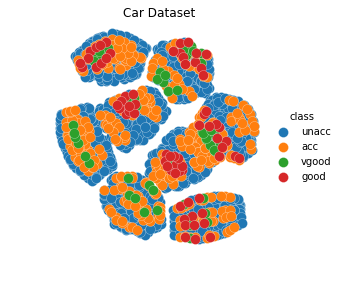

In [15]:
X_car,y_car=get_car()
plot_data("Car Dataset",X_car,y_car)

### Dataset 6- Vote Dataset
***********************************************
**Preprocessing method**

In [16]:
#Vote Dataset
#https://archive.ics.uci.edu/ml/datasets/congressional+voting+records
def get_voteData():
    #Reading dataset from the csv file
    df_vote=pd.read_csv('house_votes.csv')
    printmrdwn("Data Description")
    print(df_vote.describe())
    #Randomozing the dataset rows
    np.random.seed(1)
    shuffled_index=np.random.permutation(df_vote.index)
    df_vote=df_vote.loc[shuffled_index]
    #NonUniform distribution of data
    printmrdwn("Data Distribution")
    df_vote['Class'].value_counts().sort_index().plot.bar()
    plt.show() 
    printmrdwn("Nan Values if any")
    print(df_vote.isna().sum())
    printmrdwn("Data Types")
    print(df_vote.dtypes)
    printmrdwn("Data Set")
    print(df_vote.head(5))
    #Here in this dataaset we have question marks. I am not handling question mark. Considering the question mark as another categorical varable
    #Encoding for ordinal value
    printmrdwn("After Ordinal Encoding")
    df_vote_en= ce.OrdinalEncoder().fit_transform(df_vote)
    printmrdwn("Modified Data Types")
    print(df_vote_en.dtypes)
    printmrdwn("Modified Data")
    print(df_vote_en.head(5))
    #Convert dataset into taarget and attribute set
    # axis 1 refers to the columns
    X= df_vote_en.drop('Class', axis = 1)
    y=df_vote['Class']
    printmrdwn("Vote Dataset")
    print(X.head(5))
    printmrdwn("Class Column")
    print(y.head(5))    
    return X, y

Data Description

           Class handicapped-infants water-project-cost-sharing  \
count        435                 435                        435   
unique         2                   3                          3   
top     democrat                   n                          y   
freq         267                 236                        195   

       adoption-of-the-budget-resolution physician-fee-freeze el-salvador-aid  \
count                                435                  435             435   
unique                                 3                    3               3   
top                                    y                    n               y   
freq                                 253                  247             212   

       religious-groups-in-schools anti-satellite-test-ban  \
count                          435                     435   
unique                           3                       3   
top                              y                       y   
freq      

Data Distribution

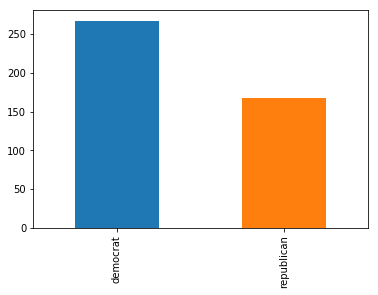

Nan Values if any

Class                                     0
handicapped-infants                       0
water-project-cost-sharing                0
adoption-of-the-budget-resolution         0
physician-fee-freeze                      0
el-salvador-aid                           0
religious-groups-in-schools               0
anti-satellite-test-ban                   0
aid-to-nicaraguan-contras                 0
mx-missile                                0
immigration                               0
synfuels-corporation-cutback              0
education-spending                        0
superfund-right-to-sue                    0
crime                                     0
duty-free-exports                         0
export-administration-act-south-africa    0
dtype: int64


Data Types

Class                                     object
handicapped-infants                       object
water-project-cost-sharing                object
adoption-of-the-budget-resolution         object
physician-fee-freeze                      object
el-salvador-aid                           object
religious-groups-in-schools               object
anti-satellite-test-ban                   object
aid-to-nicaraguan-contras                 object
mx-missile                                object
immigration                               object
synfuels-corporation-cutback              object
education-spending                        object
superfund-right-to-sue                    object
crime                                     object
duty-free-exports                         object
export-administration-act-south-africa    object
dtype: object


Data Set

          Class handicapped-infants water-project-cost-sharing  \
348    democrat                   y                          n   
201    democrat                   y                          y   
122  republican                   n                          n   
407    democrat                   n                          n   
256  republican                   n                          n   

    adoption-of-the-budget-resolution physician-fee-freeze el-salvador-aid  \
348                                 y                    n               n   
201                                 y                    n               n   
122                                 n                    y               y   
407                                 n                    y               y   
256                                 n                    y               y   

    religious-groups-in-schools anti-satellite-test-ban  \
348                           n                       y   
201             

After Ordinal Encoding

Modified Data Types

Class                                     int32
handicapped-infants                       int32
water-project-cost-sharing                int32
adoption-of-the-budget-resolution         int32
physician-fee-freeze                      int32
el-salvador-aid                           int32
religious-groups-in-schools               int32
anti-satellite-test-ban                   int32
aid-to-nicaraguan-contras                 int32
mx-missile                                int32
immigration                               int32
synfuels-corporation-cutback              int32
education-spending                        int32
superfund-right-to-sue                    int32
crime                                     int32
duty-free-exports                         int32
export-administration-act-south-africa    int32
dtype: object


Modified Data

     Class  handicapped-infants  water-project-cost-sharing  \
348      1                    1                           1   
201      1                    1                           2   
122      2                    2                           1   
407      1                    2                           1   
256      2                    2                           1   

     adoption-of-the-budget-resolution  physician-fee-freeze  el-salvador-aid  \
348                                  1                     1                1   
201                                  1                     1                1   
122                                  2                     2                2   
407                                  2                     2                2   
256                                  2                     2                2   

     religious-groups-in-schools  anti-satellite-test-ban  \
348                            1                        1   
201         

Vote Dataset

     handicapped-infants  water-project-cost-sharing  \
348                    1                           1   
201                    1                           2   
122                    2                           1   
407                    2                           1   
256                    2                           1   

     adoption-of-the-budget-resolution  physician-fee-freeze  el-salvador-aid  \
348                                  1                     1                1   
201                                  1                     1                1   
122                                  2                     2                2   
407                                  2                     2                2   
256                                  2                     2                2   

     religious-groups-in-schools  anti-satellite-test-ban  \
348                            1                        1   
201                            1                      

Class Column

348      democrat
201      democrat
122    republican
407      democrat
256    republican
Name: Class, dtype: object


C:\Users\Petrofac\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


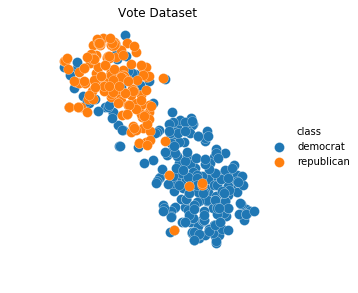

In [17]:
X_vote,y_vote=get_voteData()
plot_data("Vote Dataset",X_vote,y_vote)

### Dataset 7- Sonar Dataset
***********************************************
**Preprocessing method**

In [18]:
#Sonar Dataset
#http://archive.ics.uci.edu/ml/datasets/connectionist+bench+(sonar,+mines+vs.+rocks)
def get_sonarData():
    #Reading dataset from the csv file
    df_sonar=pd.read_csv('sonar.csv')
    printmrdwn("Data Description")
    print(df_sonar.describe())
    #Randomozing the dataset rows
    np.random.seed(1)
    shuffled_index=np.random.permutation(df_sonar.index)
    df_sonar=df_sonar.loc[shuffled_index]
    #NonUniform distribution of data
    printmrdwn("Data Distribution")
    df_sonar['Class'].value_counts().sort_index().plot.bar()
    plt.show() 
    printmrdwn("Nan Values if any")
    print(df_sonar.isna().sum())
    printmrdwn("Data Types")
    print(df_sonar.dtypes)
    printmrdwn("Data Set")
    print(df_sonar.head(5))
    #Convert dataset into taarget and attribute set
    # axis 1 refers to the columns
    X= df_sonar.drop('Class', axis = 1)
    y=df_sonar['Class']
    printmrdwn("Sonar Dataset")
    print(X.head(5))
    printmrdwn("Class Column")
    print(y.head(5))
    return X, y

Data Description

        Feature_1   Feature_2   Feature_3   Feature_4   Feature_5   Feature_6  \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

        Feature_7   Feature_8   Feature_9  Feature_10     ...      Feature_51  \
count  208.000000  208.000000  208.000000  208.000000     ...      208.000000   
mean     0.121747    0.134799    0.178003    0.208259     ...        0.016069   
std      0.061788    0.0851

Data Distribution

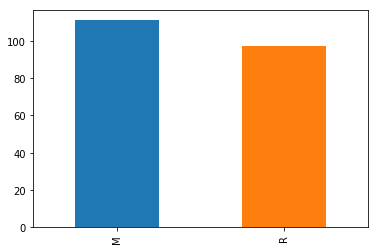

Nan Values if any

Feature_1     0
Feature_2     0
Feature_3     0
Feature_4     0
Feature_5     0
Feature_6     0
Feature_7     0
Feature_8     0
Feature_9     0
Feature_10    0
Feature_11    0
Feature_12    0
Feature_13    0
Feature_14    0
Feature_15    0
Feature_16    0
Feature_17    0
Feature_18    0
Feature_19    0
Feature_20    0
Feature_21    0
Feature_22    0
Feature_23    0
Feature_24    0
Feature_25    0
Feature_26    0
Feature_27    0
Feature_28    0
Feature_29    0
Feature_30    0
             ..
Feature_32    0
Feature_33    0
Feature_34    0
Feature_35    0
Feature_36    0
Feature_37    0
Feature_38    0
Feature_39    0
Feature_40    0
Feature_41    0
Feature_42    0
Feature_43    0
Feature_44    0
Feature_45    0
Feature_46    0
Feature_47    0
Feature_48    0
Feature_49    0
Feature_50    0
Feature_51    0
Feature_52    0
Feature_53    0
Feature_54    0
Feature_55    0
Feature_56    0
Feature_57    0
Feature_58    0
Feature_59    0
Feature_60    0
Class         0
Length: 61, dtype: int64

Data Types

Feature_1     float64
Feature_2     float64
Feature_3     float64
Feature_4     float64
Feature_5     float64
Feature_6     float64
Feature_7     float64
Feature_8     float64
Feature_9     float64
Feature_10    float64
Feature_11    float64
Feature_12    float64
Feature_13    float64
Feature_14    float64
Feature_15    float64
Feature_16    float64
Feature_17    float64
Feature_18    float64
Feature_19    float64
Feature_20    float64
Feature_21    float64
Feature_22    float64
Feature_23    float64
Feature_24    float64
Feature_25    float64
Feature_26    float64
Feature_27    float64
Feature_28    float64
Feature_29    float64
Feature_30    float64
               ...   
Feature_32    float64
Feature_33    float64
Feature_34    float64
Feature_35    float64
Feature_36    float64
Feature_37    float64
Feature_38    float64
Feature_39    float64
Feature_40    float64
Feature_41    float64
Feature_42    float64
Feature_43    float64
Feature_44    float64
Feature_45    float64
Feature_46

Data Set

     Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
186     0.0209     0.0191     0.0411     0.0321     0.0698     0.1579   
155     0.0211     0.0128     0.0015     0.0450     0.0711     0.1563   
165     0.0221     0.0065     0.0164     0.0487     0.0519     0.0849   
200     0.0131     0.0387     0.0329     0.0078     0.0721     0.1341   
58      0.0225     0.0019     0.0075     0.0097     0.0445     0.0906   

     Feature_7  Feature_8  Feature_9  Feature_10  ...    Feature_52  \
186     0.1438     0.1402     0.3048      0.3914  ...        0.0078   
155     0.1518     0.1206     0.1666      0.1345  ...        0.0117   
165     0.0812     0.1833     0.2228      0.1810  ...        0.0089   
200     0.1626     0.1902     0.2610      0.3193  ...        0.0150   
58      0.0889     0.0655     0.1624      0.1452  ...        0.0034   

     Feature_53  Feature_54  Feature_55  Feature_56  Feature_57  Feature_58  \
186      0.0201      0.0104      0.0039      0.0031    

Sonar Dataset

     Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
186     0.0209     0.0191     0.0411     0.0321     0.0698     0.1579   
155     0.0211     0.0128     0.0015     0.0450     0.0711     0.1563   
165     0.0221     0.0065     0.0164     0.0487     0.0519     0.0849   
200     0.0131     0.0387     0.0329     0.0078     0.0721     0.1341   
58      0.0225     0.0019     0.0075     0.0097     0.0445     0.0906   

     Feature_7  Feature_8  Feature_9  Feature_10     ...      Feature_51  \
186     0.1438     0.1402     0.3048      0.3914     ...          0.0054   
155     0.1518     0.1206     0.1666      0.1345     ...          0.0174   
165     0.0812     0.1833     0.2228      0.1810     ...          0.0167   
200     0.1626     0.1902     0.2610      0.3193     ...          0.0137   
58      0.0889     0.0655     0.1624      0.1452     ...          0.0051   

     Feature_52  Feature_53  Feature_54  Feature_55  Feature_56  Feature_57  \
186      0.0078      0.02

Class Column

186    M
155    M
165    M
200    M
58     R
Name: Class, dtype: object


C:\Users\Petrofac\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


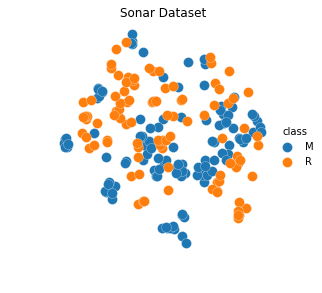

In [19]:
X_sonar,y_sonar=get_sonarData()
plot_data("Sonar Dataset",X_sonar,y_sonar)

### Dataset 8- Digit Recognizer Dataset
***********************************************
**Preprocessing method**

In [36]:
#Digit-Recognizer Dataset- From kaggle
#https://www.kaggle.com/c/digit-recognizer/data
def get_digitData():
    #Reading dataset from the csv file
    df_digitRecognizer=pd.read_csv('DigitRecognizer.csv')
    printmrdwn("Data Description")
    print(df_digitRecognizer.describe())
    #Randomozing the dataset rows
    np.random.seed(1)
    shuffled_index=np.random.permutation(df_digitRecognizer.index)
    df_digitRecognizer=df_digitRecognizer.loc[shuffled_index]
    # #NonUniform distribution of data
    printmrdwn("Data Distribution")
    df_digitRecognizer['label'].value_counts().sort_index().plot.bar()
    plt.show() 
    printmrdwn("Nan Values if any")
    print(df_digitRecognizer.isna().sum())
    printmrdwn("Data Types")
    print(df_digitRecognizer.dtypes)
    printmrdwn("Data Set")
    print(df_digitRecognizer.head(5))
    #To display digits in the dataset
    printmrdwn("Data Image")
    indx=205
    img=np.array(df_digitRecognizer.loc[indx,'pixel0':'pixel783']).reshape(28,28)
    plt.imshow(img,cmap='gray')
    plt.show()
    #Convert dataset into taarget and attribute set
    # axis 1 refers to the columns
    X= df_digitRecognizer.drop('label', axis = 1)
    X=X.loc[:,'pixel0':'pixel783']/255
    y=df_digitRecognizer['label']
    printmrdwn("Digit Recognizer Dataset")
    print(X.head(5))
    printmrdwn("Label Column")
    print(y.head(5))
    return X, y



Data Description

              label   pixel0   pixel1   pixel2   pixel3   pixel4   pixel5  \
count  42000.000000  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0   
mean       4.456643      0.0      0.0      0.0      0.0      0.0      0.0   
std        2.887730      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
25%        2.000000      0.0      0.0      0.0      0.0      0.0      0.0   
50%        4.000000      0.0      0.0      0.0      0.0      0.0      0.0   
75%        7.000000      0.0      0.0      0.0      0.0      0.0      0.0   
max        9.000000      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel6   pixel7   pixel8    ...         pixel774      pixel775  \
count  42000.0  42000.0  42000.0    ...     42000.000000  42000.000000   
mean       0.0      0.0      0.0    ...         0.219286      0.117095   
std        0.0      0.0      0.0    ...         6.312890      4.633819   
min       

Data Distribution

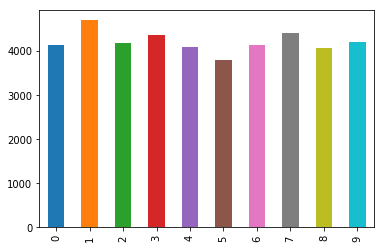

Nan Values if any

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
           ..
pixel754    0
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64


Data Types

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
pixel5      int64
pixel6      int64
pixel7      int64
pixel8      int64
pixel9      int64
pixel10     int64
pixel11     int64
pixel12     int64
pixel13     int64
pixel14     int64
pixel15     int64
pixel16     int64
pixel17     int64
pixel18     int64
pixel19     int64
pixel20     int64
pixel21     int64
pixel22     int64
pixel23     int64
pixel24     int64
pixel25     int64
pixel26     int64
pixel27     int64
pixel28     int64
            ...  
pixel754    int64
pixel755    int64
pixel756    int64
pixel757    int64
pixel758    int64
pixel759    int64
pixel760    int64
pixel761    int64
pixel762    int64
pixel763    int64
pixel764    int64
pixel765    int64
pixel766    int64
pixel767    int64
pixel768    int64
pixel769    int64
pixel770    int64
pixel771    int64
pixel772    int64
pixel773    int64
pixel774    int64
pixel775    int64
pixel776    int64
pixel777    int64
pixel778  

Data Set

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
29633      1       0       0       0       0       0       0       0       0   
345        5       0       0       0       0       0       0       0       0   
36369      2       0       0       0       0       0       0       0       0   
16624      8       0       0       0       0       0       0       0       0   
14389      4       0       0       0       0       0       0       0       0   

       pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
29633       0    ...            0         0         0         0         0   
345         0    ...            0         0         0         0         0   
36369       0    ...            0         0         0         0         0   
16624       0    ...            0         0         0         0         0   
14389       0    ...            0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783 

Data Image

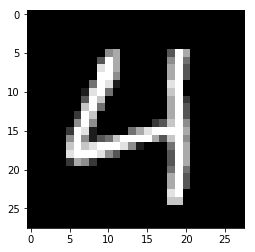

Digit Recognizer Dataset

       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
29633     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
345       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
36369     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
16624     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
14389     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel9    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
29633     0.0    ...          0.0       0.0       0.0       0.0       0.0   
345       0.0    ...          0.0       0.0       0.0       0.0       0.0   
36369     0.0    ...          0.0       0.0       0.0       0.0       0.0   
16624     0.0    ...          0.0       0.0       0.0       0.0       0.0   
14389     0.0    ...          0.0       0.0       0.0       0.0       0.0   

       pixel779  pixel780  pixel781  pixel782  pix

Label Column

29633    1
345      5
36369    2
16624    8
14389    4
Name: label, dtype: int64


C:\Users\Petrofac\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


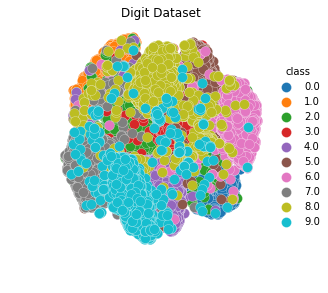

In [37]:
X_digit,y_digit=get_digitData()
plot_data("Digit Dataset",X_digit,y_digit)

### Dataset 9-  Iris Dataset
***********************************************
**Preprocessing method**

In [20]:
#Iris Dataset from UCI
#https://archive.ics.uci.edu/ml/datasets/iris
def get_IrisData():
    #Reading dataset from the csv file
    df_iris=pd.read_csv('iris.csv')
    printmrdwn("Data Description")
    print(df_iris.describe())
    #Randomozing the dataset rows
    np.random.seed(1)
    shuffled_index=np.random.permutation(df_iris.index)
    df_iris=df_iris.loc[shuffled_index]
    #NonUniform distribution of data
    printmrdwn("Data Distribution")
    df_iris['species'].value_counts().sort_index().plot.bar()
    plt.show() 
    printmrdwn("Nan Values if any")
    print(df_iris.isna().sum())
    printmrdwn("Data Types")
    print(df_iris.dtypes)
    printmrdwn("Data Set")
    print(df_iris.head(5))
    #Convert dataset into taarget and attribute set
    # axis 1 refers to the columns
    X= df_iris.drop('species', axis = 1)
    y=df_iris['species']
    printmrdwn("Iris Dataset")
    print(X.head(5))
    printmrdwn("Class Column")
    print(y.head(5))
    return X, y



Data Description

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


Data Distribution

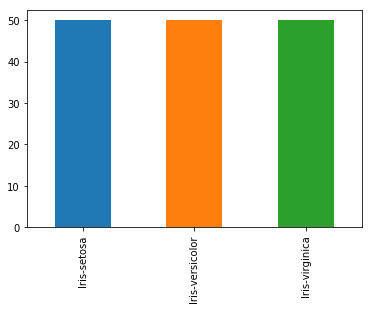

Nan Values if any

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


Data Types

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


Data Set

     sepal_length  sepal_width  petal_length  petal_width          species
14            5.8          4.0           1.2          0.2      Iris-setosa
98            5.1          2.5           3.0          1.1  Iris-versicolor
75            6.6          3.0           4.4          1.4  Iris-versicolor
16            5.4          3.9           1.3          0.4      Iris-setosa
131           7.9          3.8           6.4          2.0   Iris-virginica


Iris Dataset

     sepal_length  sepal_width  petal_length  petal_width
14            5.8          4.0           1.2          0.2
98            5.1          2.5           3.0          1.1
75            6.6          3.0           4.4          1.4
16            5.4          3.9           1.3          0.4
131           7.9          3.8           6.4          2.0


Class Column

14         Iris-setosa
98     Iris-versicolor
75     Iris-versicolor
16         Iris-setosa
131     Iris-virginica
Name: species, dtype: object


C:\Users\Petrofac\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


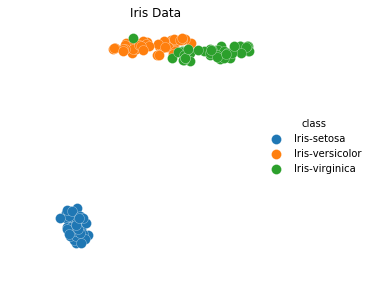

In [21]:
X_iris,y_iris=get_IrisData()
plot_data("Iris Data",X_iris,y_iris)

### Dataset 10- Mushroom  Dataset
***********************************************
**Preprocessing method**

In [34]:
#Mushroom Dataset
#https://www.kaggle.com/uciml/mushroom-classification/downloads/mushrooms.csv/1
def get_mushroomData():
    #Reading dataset from the csv file
    df_mushrooms=pd.read_csv('mushrooms.csv')
    printmrdwn("Data Description")
    print(df_mushrooms.describe())
    #Randomozing the dataset rows
    np.random.seed(1)
    shuffled_index=np.random.permutation(df_mushrooms.index)
    df_mushrooms=df_mushrooms.loc[shuffled_index]
    #NonUniform distribution of data
    printmrdwn("Data Distribution")
    df_mushrooms['class'].value_counts().sort_index().plot.bar()
    plt.show() 
    printmrdwn("Nan Values if any")
    print(df_mushrooms.isna().sum())
    printmrdwn("Data Types Before Encoding")
    print(df_mushrooms.dtypes)
    printmrdwn("Data Set")
    print(df_mushrooms.head(5))
    #Convert dataset into taarget and attribute set
    # axis 1 refers to the columns
    X= df_mushrooms.drop('class', axis = 1)
    y=df_mushrooms['class']
    #Encoded data
    X=X.apply(LabelEncoder().fit_transform)
    printmrdwn("Data Set After Encoding")
    print(X.head(5),y.head(5))
    printmrdwn("Data Types After Encoding")
    print(X.dtypes)
    printmrdwn("Mushroom Dataset")
    print(X.head(5))
    printmrdwn("Class Column")
    print(y.head(5))
    return X, y



Data Description

       class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color   ...   stalk-surface-below-ring  \
count          8124      8124       8124   ...                       8124   
unique            2         2         12   ...                          4   
top               c         b          b   ...                          s   
freq           6812      5612       1728   ...                       4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1       

Data Distribution

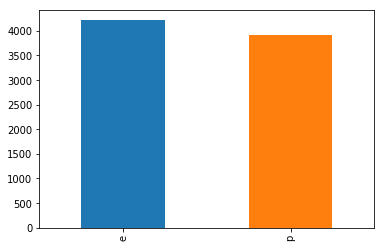

Nan Values if any

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


Data Types Before Encoding

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object


Data Set

     class cap-shape cap-surface cap-color bruises odor gill-attachment  \
1392     e         f           s         w       f    n               f   
4051     p         x           f         p       f    c               f   
3725     p         x           s         w       f    c               f   
7177     p         k           s         n       f    f               f   
103      e         x           y         y       t    a               f   

     gill-spacing gill-size gill-color   ...   stalk-surface-below-ring  \
1392            w         b          h   ...                          f   
4051            w         n          u   ...                          s   
3725            w         n          g   ...                          s   
7177            c         n          b   ...                          k   
103             c         b          n   ...                          y   

     stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
1392                   

Data Set After Encoding

      cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
1392          2            2          8        0     5                1   
4051          5            0          5        0     1                1   
3725          5            2          8        0     1                1   
7177          3            2          4        0     2                1   
103           5            3          9        1     0                1   

      gill-spacing  gill-size  gill-color  stalk-shape   ...     \
1392             1          0           3            1   ...      
4051             1          1           9            0   ...      
3725             1          1           2            0   ...      
7177             0          1           0            1   ...      
103              0          0           5            0   ...      

      stalk-surface-below-ring  stalk-color-above-ring  \
1392                         0                       7   
4051                         2

Data Types After Encoding

cap-shape                   int32
cap-surface                 int32
cap-color                   int32
bruises                     int32
odor                        int32
gill-attachment             int32
gill-spacing                int32
gill-size                   int32
gill-color                  int32
stalk-shape                 int32
stalk-root                  int32
stalk-surface-above-ring    int32
stalk-surface-below-ring    int32
stalk-color-above-ring      int32
stalk-color-below-ring      int32
veil-type                   int32
veil-color                  int32
ring-number                 int32
ring-type                   int32
spore-print-color           int32
population                  int32
habitat                     int32
dtype: object


Mushroom Dataset

      cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
1392          2            2          8        0     5                1   
4051          5            0          5        0     1                1   
3725          5            2          8        0     1                1   
7177          3            2          4        0     2                1   
103           5            3          9        1     0                1   

      gill-spacing  gill-size  gill-color  stalk-shape   ...     \
1392             1          0           3            1   ...      
4051             1          1           9            0   ...      
3725             1          1           2            0   ...      
7177             0          1           0            1   ...      
103              0          0           5            0   ...      

      stalk-surface-below-ring  stalk-color-above-ring  \
1392                         0                       7   
4051                         2

Class Column

1392    e
4051    p
3725    p
7177    p
103     e
Name: class, dtype: object


C:\Users\Petrofac\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


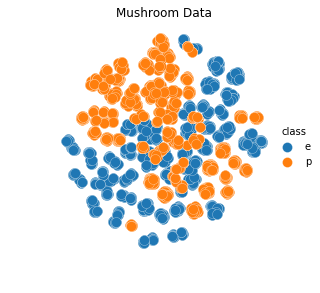

In [35]:
X_mushroom,y_mushroom=get_mushroomData()
plot_data("Mushroom Data",X_mushroom,y_mushroom)